*list of features used:
age,
sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target- the predicted attribute
![heart](https://images.pexels.com/photos/744667/pexels-photo-744667.jpeg?cs=srgb&dl=silhouette-photo-of-man-leaning-on-heart-shaped-tree-744667.jpg&fm=jpg)

In [117]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
#import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

I have used three different machine learning Algoritham-

1.RandomForest
2.KNeighbors
3.LogisticReggression

In [119]:
#reading data from csv using pandas
data = pd.read_csv("../input/heart-disease-uci/heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


About The Dataset

In [120]:
data.shape
#to see how many rows and columns we have in table

(303, 14)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


understanding the data is vary important to know about the features the values

1    165
0    138
Name: target, dtype: int64

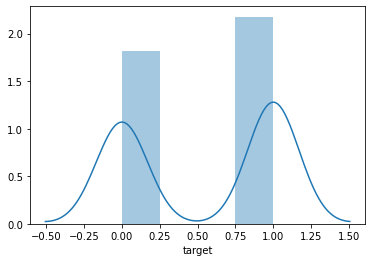

In [122]:
sns.distplot(data["target"])
data["target"].value_counts()

In [123]:
#too see data having null values or not#in way to see any missing values.
print("Data Sum of Null Values\n")
data.isnull().sum()


Data Sum of Null Values



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
null = data.isnull()
null

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no null values in dataset
isnull() if showing True this means there must be null value otherswise false.

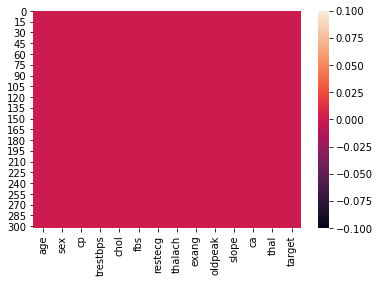

In [125]:
#the seaborn heatmap shows the clear view off entire dataset that theres no null
sns.heatmap(null)

Text(0.5, 1.0, 'ploting of age feature')

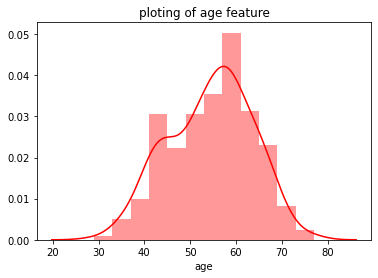

In [126]:
sns.distplot(data["age"], color= "red" )
plt.title("ploting of age feature")
#visulize data as per age

In [127]:
#to find minimum and maximum ages
minAge =min(data["age"])
maxAge =max(data["age"])
avgAge = (data["age"]).mean()
print("Minimum age:",minAge)
print("Maximum age:",maxAge)
print("Average age:",avgAge)

Minimum age: 29
Maximum age: 77
Average age: 54.366336633663366


In [128]:
#we can also understand data into age catagries 
Young_age = data[(data.age>=29)&(data.age<40)]
Meddle_age = data[(data.age>=40)&(data.age<55)]
Elderly_age = data[(data.age>55)]

In [129]:
print("Young age people:",len(Young_age))
print("Meddle age people:",len(Meddle_age)) 
print("Elderly age people",len(Elderly_age)) 

Young age people: 16
Meddle age people: 128
Elderly age people 151


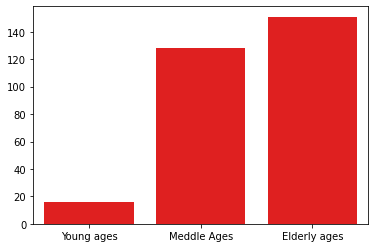

In [130]:
sns.barplot(x = ["Young ages","Meddle Ages","Elderly ages"], y =[len(Young_age),len(Meddle_age),len(Elderly_age)], color = "red")

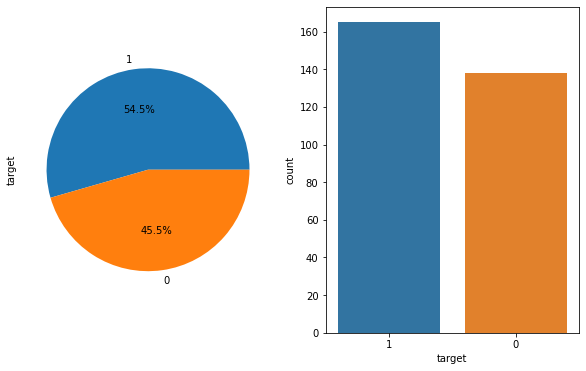

In [131]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data["target"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%')
sns.countplot('target',data=data,ax=ax[1],order=data['sex'].value_counts().index)

Text(0.5, 1.0, 'heart disease by sex')

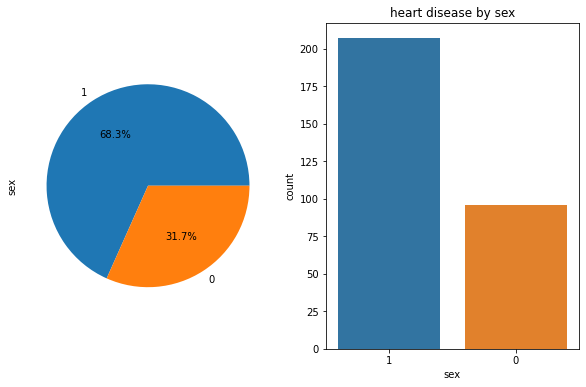

In [132]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data["sex"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%')
sns.countplot('sex',data=data,ax=ax[1],order=data['sex'].value_counts().index)
plt.title("heart disease by sex")

Text(0.5, 1.0, 'by type of chest pain')

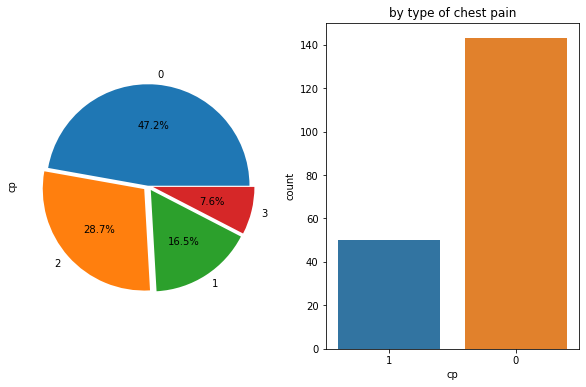

In [133]:
#cheast pain types
f,ax=plt.subplots(1,2,figsize=(10,6))
data["cp"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%',explode = [0,0.05,0.05,0.05])
sns.countplot('cp',data=data,ax=ax[1],order=data['sex'].value_counts().index)
plt.title("by type of chest pain")

In [134]:
#plot the target variable
#with the displot visulization we can see the average age of people suuffering from heart disease

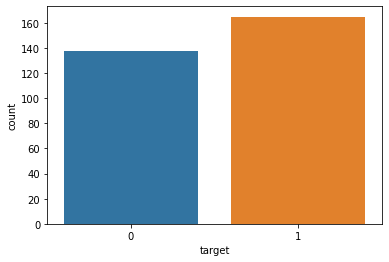

In [135]:
sns.countplot(data["target"])
#where 0 shows that no heart attack and 1 shows that having an heart attack

(0.0, 1.0, 0.0, 1.0)

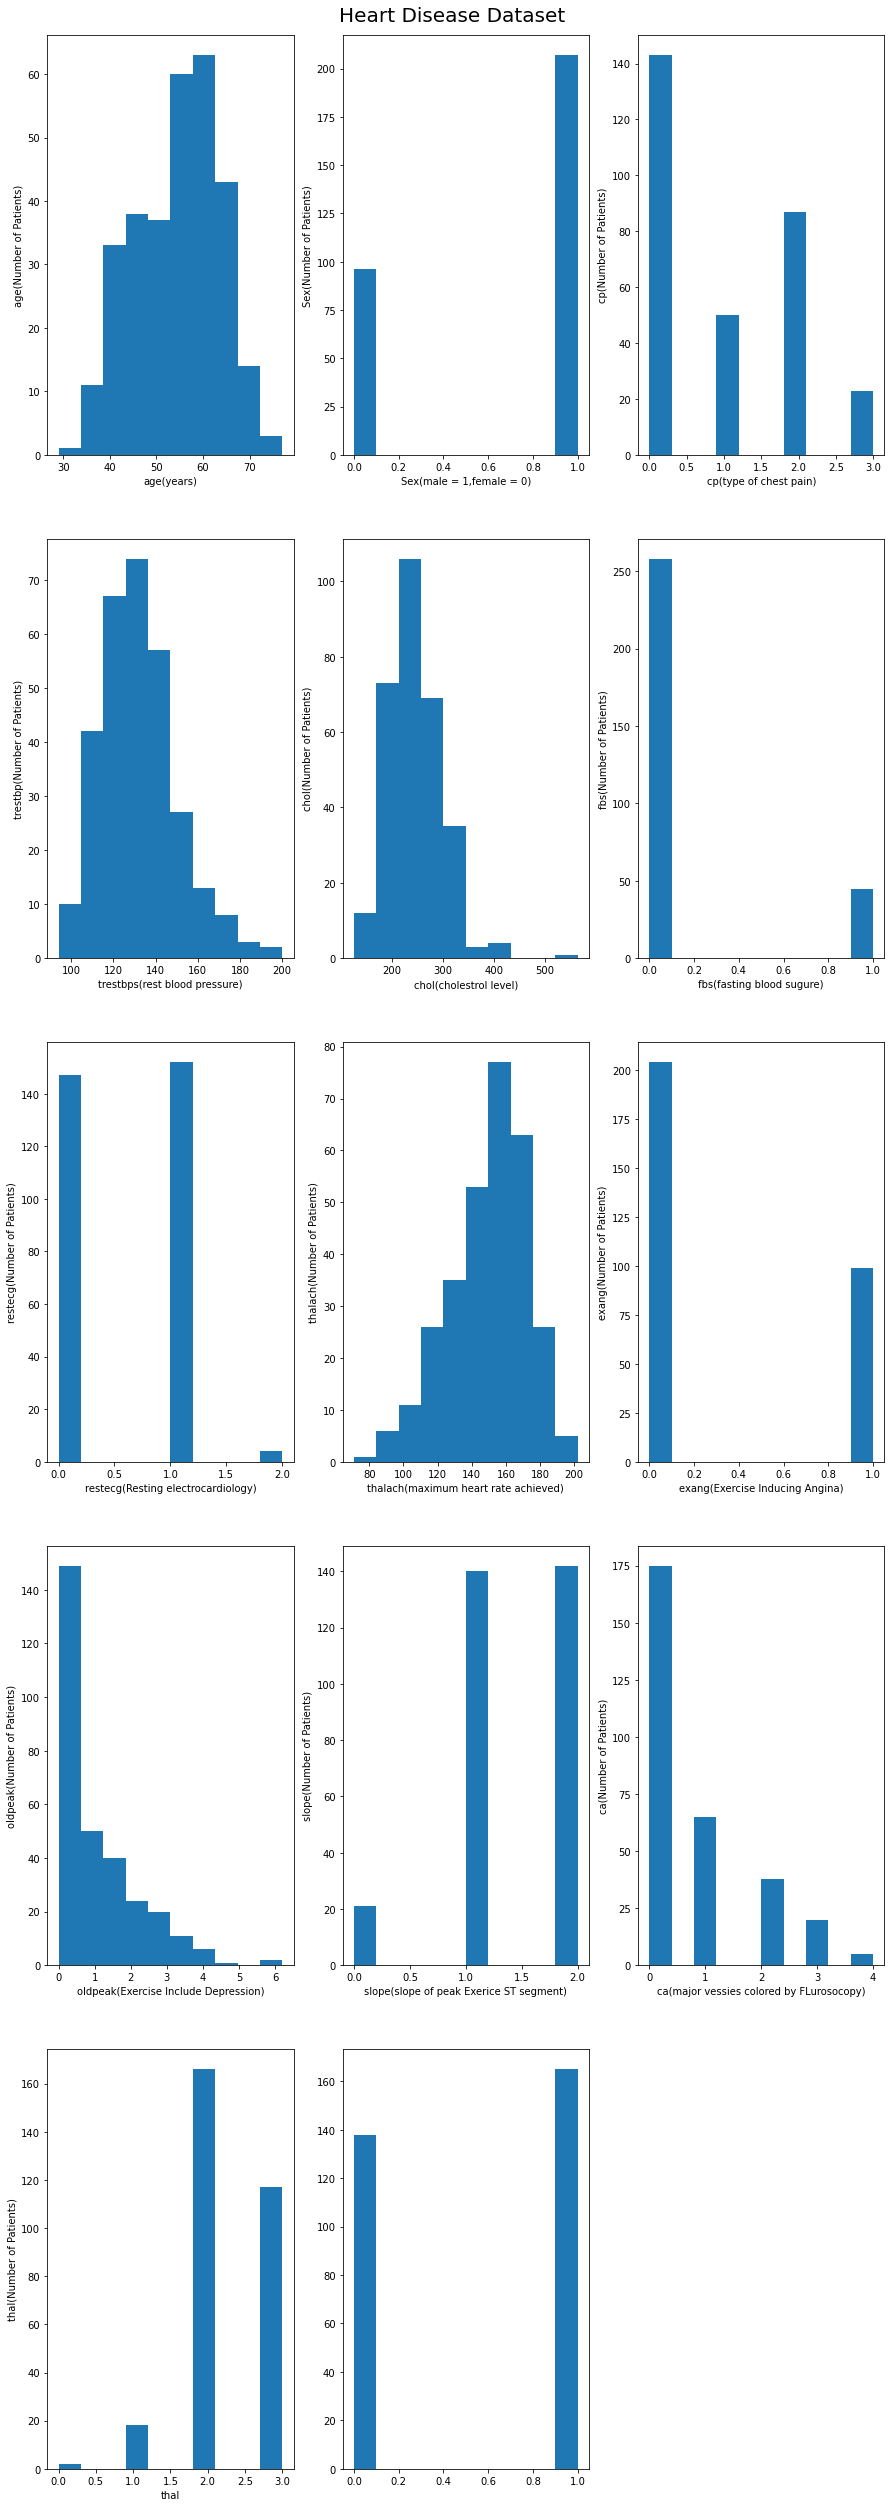

In [136]:
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Dataset", fontsize=20)

axes[0,0].hist(data.age)
axes[0,0].set_xlabel("age(years)")
axes[0,0].set_ylabel("age(Number of Patients)")

axes[0,1].hist(data.sex)
axes[0,1].set_xlabel("Sex(male = 1,female = 0)")
axes[0,1].set_ylabel("Sex(Number of Patients)")

axes[0,2].hist(data.cp)
axes[0,2].set_xlabel("cp(type of chest pain)")
axes[0,2].set_ylabel("cp(Number of Patients)")

axes[1,0].hist(data.trestbps)
axes[1,0].set_xlabel("trestbps(rest blood pressure)")
axes[1,0].set_ylabel("trestbp(Number of Patients)")

axes[1,1].hist(data.chol)
axes[1,1].set_xlabel("chol(cholestrol level)")
axes[1,1].set_ylabel("chol(Number of Patients)")


axes[1,2].hist(data.fbs)
axes[1,2].set_xlabel("fbs(fasting blood sugure)")
axes[1,2].set_ylabel("fbs(Number of Patients)")


axes[2,0].hist(data.restecg)
axes[2,0].set_xlabel("restecg(Resting electrocardiology)")
axes[2,0].set_ylabel("restecg(Number of Patients)")

axes[2,1].hist(data.thalach)
axes[2,1].set_xlabel("thalach(maximum heart rate achieved)")
axes[2,1].set_ylabel("thalach(Number of Patients)")

axes[2,2].hist(data.exang)
axes[2,2].set_xlabel("exang(Exercise Inducing Angina)")
axes[2,2].set_ylabel("exang(Number of Patients)")

axes[3,0].hist(data.oldpeak)
axes[3,0].set_xlabel("oldpeak(Exercise Include Depression)")
axes[3,0].set_ylabel("oldpeak(Number of Patients)")

axes[3,1].hist(data.slope)
axes[3,1].set_xlabel("slope(slope of peak Exerice ST segment)")
axes[3,1].set_ylabel("slope(Number of Patients)")

axes[3,2].hist(data.ca)
axes[3,2].set_xlabel("ca(major vessies colored by FLurosocopy)")
axes[3,2].set_ylabel("ca(Number of Patients)")

axes[4,0].hist(data.thal)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylabel("thal(Number of Patients)")

axes[4,1].hist(data.target)
axes[4,2].axis("off")


In [137]:
#plot an correlation using seaborn 

In [138]:
corr = data.corr()
corr
#correlation between features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


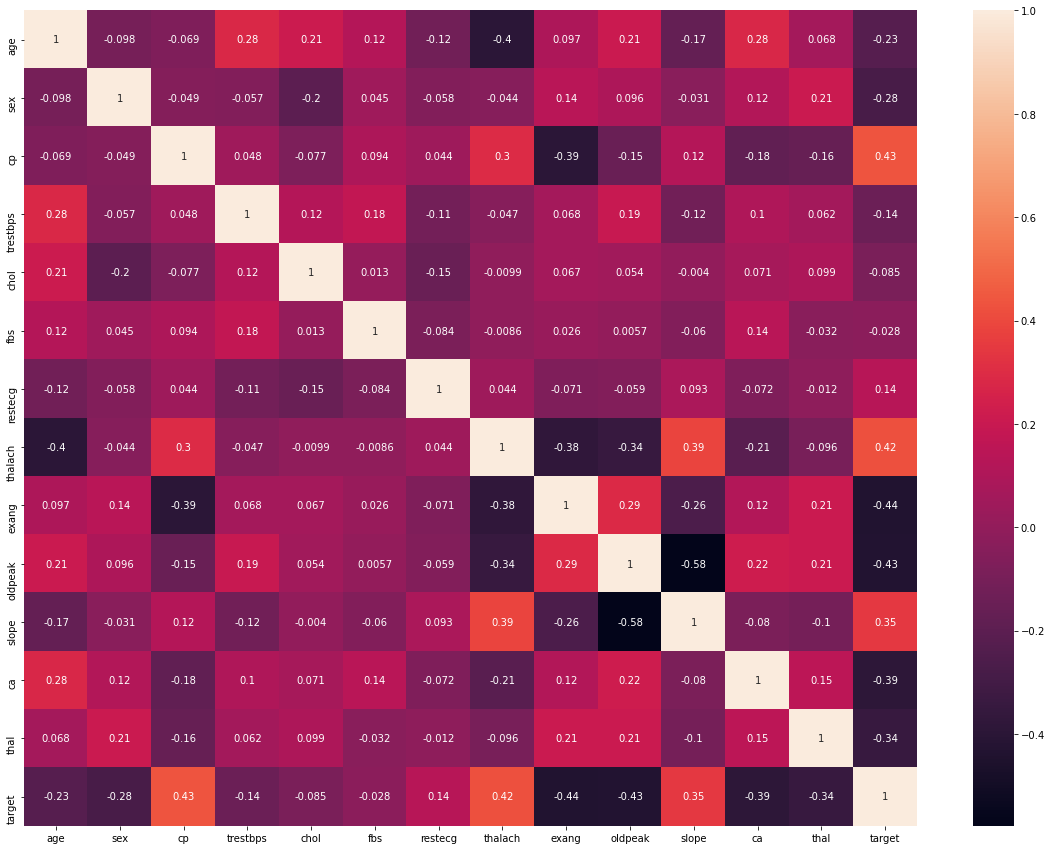

In [139]:
plt.figure(figsize =(20,15))
sns.heatmap(corr,annot= True)

In [140]:
#by analysing the positive and negative values we can understand the correlation between
# how positivalues and negativevalues have affect on each other in  feature.

In [141]:
#select the dependent and independent fetaures
#the target we have is independent features

In [142]:
X = data.drop("target",axis = 1)

In [143]:
#dependent feature 
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [144]:
#independent feature
y = data["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [145]:
#now we have we have to create both training data and independent 

In [146]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2,random_state = 0)

In [147]:
#the model we are imported #from sklearn.ensemble import RandomForestClassifier

In [148]:
random_forest = RandomForestClassifier(n_estimators=100)
#fit the training parameter we created
random_forest.fit(X_train,y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,y_train)

1.0

In [149]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [150]:
print(confusion_matrix(y_test,Y_prediction))

[[21  6]
 [ 4 30]]


In [151]:
#we can plot the confusion matrix in heatmap

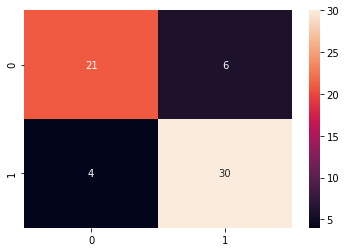

In [152]:
sns.heatmap(confusion_matrix(y_test,Y_prediction),annot= True)

In [153]:
#feature importance in random forest

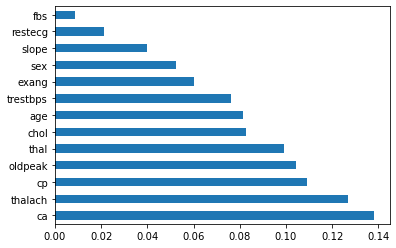

In [154]:
feat_importances = pd.Series(random_forest.feature_importances_,index= X.columns) 
feat_importances.nlargest(15).plot(kind = "barh")

using knn classifier

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
#giving dependent variable
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [157]:
data_scaled = scaler.transform(X)
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [158]:
final_data = pd.DataFrame(data_scaled,columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
#not adding independent feature

In [159]:
final_data.head()
#just for understanding 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [160]:
data.target
#the test  data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

i know we did same things;]
so lets start with KNeighborsClassifier

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=5)

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [164]:
#have to predict
knnpredict = knn.predict(X_test)

In [165]:
print(classification_report(y_test,knnpredict))
print(confusion_matrix(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

[[17 10]
 [12 22]]


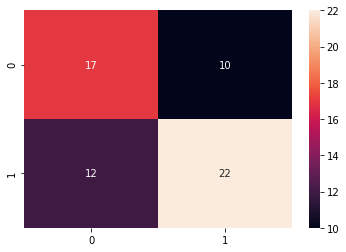

In [166]:
sns.heatmap(confusion_matrix(y_test,knnpredict),annot = True)

In [167]:
#using logistic regression with sciket learn

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score
from sklearn import metrics

In [169]:
model = LogisticRegression( fit_intercept=True,penalty='l2',dual=False,C=1.0)
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [170]:
modelpredict = model.predict(X_test)

In [171]:
print(classification_report(y_test,modelpredict))
print(confusion_matrix(y_test,modelpredict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[22  5]
 [ 4 30]]
